In [1]:
%matplotlib inline
import pandas as pd

In [ ]:
# from IPython.core.display import HTML
# css = open('style-table.css').read() + open('style-notebook.css').read()
# HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Justin Bieber: Always Believing,2012
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [7]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year','character']).size()
c = c.unstack(level = 1)
c = c.fillna(0)

newdf = c.Superman - c.Batman
print("Number of Superman Years:")
print(len(newdf[newdf > 0]))

Number of Superman Years:
12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [8]:
print("Number of Batman Years:")
print(len(newdf[newdf < 0]))

Number of Batman Years:
24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

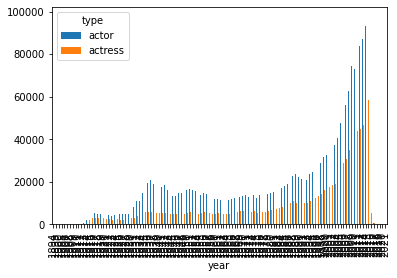

In [16]:
c = cast
c = c.groupby(['year', 'type']).size()
c= c.unstack('type')
c.plot(kind = 'bar')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

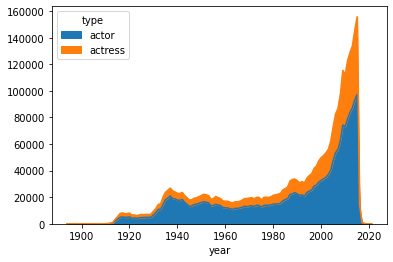

In [17]:
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

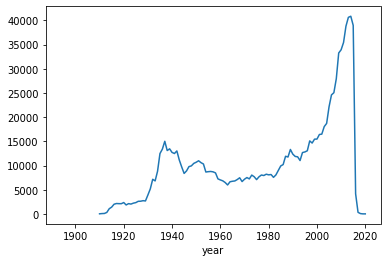

In [19]:
newdf = c.actor - c.actress
newdf.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

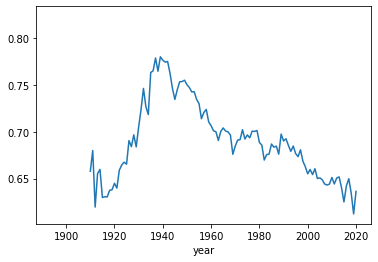

In [20]:
(c.actor / (c.actor + c.actress)).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

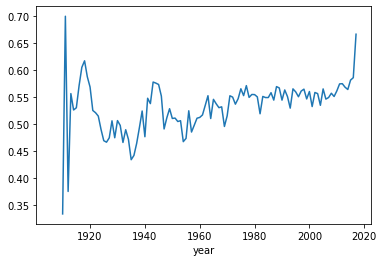

In [22]:
c = cast[cast.n == 2]
c= c.groupby(['year','type']).size()
c = c.unstack(level = 1)
(c.actor / (c.actor + c.actress)).plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

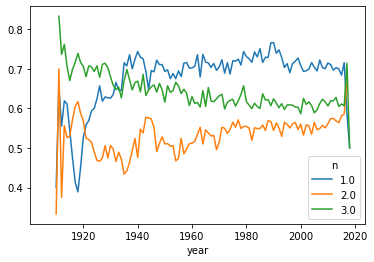

In [23]:
c = cast[cast.n <= 3]
c = c.groupby(['year','type','n']).size()
c = c.unstack(level = 1)
newdf = (c.actor / (c.actor + c.actress) )
newdf = newdf.unstack('n')
newdf.plot()